In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression, Lasso, Ridge
import statsmodels.api as sm
import statsmodels.formula.api as smf

from collections import defaultdict

In [2]:
# Read KS data collected in January
# ks_df = pd.read_csv('./kickstarter_data/01.csv', index_col=0)
# relevant_categories = ['design/product design', 'fashion/apparel', 'fashion/accessories', 'fashion', 'technology/gadgets', 'fashion/footwear', 'fashion/ready-to-wear', 'art/textiles', 'fashion/childrenswear', 'fashion/couture', 'technology/wearables']
# relevant_df = ks_df[ks_df.category.isin(relevant_categories)]

In [3]:
# Read Amzn Data
amz_df = pd.read_csv('./amazon_data/Duffel.csv')
amz_df_tt = pd.read_csv('./amazon_data/TravelTote.csv')
amz_df_luggage = pd.read_csv('./amazon_data/Luggage.csv')

In [4]:
new_df = pd.concat([amz_df, amz_df_tt, amz_df_luggage], ignore_index=True)

In [5]:
new_df.head()

,1 Stars,2 Stars,3 Stars,4 Stars,5 Stars,Brand,Name,Price,Product Details,Product Details Alt,Review Count,Star Rating,Styles,Url
0,1 star (10%),2 star (7%),3 star (9%),4 star (15%),5 star (59%),NaN,Herschel Supply Co. Novel Duffle Bag,65.00,NaN,Product Dimensions: 11 x 20.5 x 11.5 inches; ...,751 customer reviews,4.2 out of 5 stars,Black Grid; Black/Black; Black/Blueprint/White...,NaN
1,1 star (3%),2 star (3%),3 star (4%),4 star (18%),5 star (72%),Ledmark,Ledmark Heavyweight Cotton Canvas Outback Duff...,25.99 - 149.99,NaN,Shipping Information: View shipping rates and...,684 customer reviews,4.6 out of 5 stars,Green; Black,NaN
2,1 star (15%),2 star (7%),3 star (8%),4 star (16%),5 star (54%),NaN,Olympia USA 33 Inch 8 Pocket Rolling Duffel,42.99,NaN,Package Dimensions: 32 x 12 x 5 inches; Shipp...,1158 customer reviews,3.7 out of 5 stars,Black; Black w/ Beige - Exclusive Color; Charc...,NaN
3,1 star (6%),2 star (5%),3 star (8%),4 star (19%),5 star (62%),NaN,"Olympia Luggage 22"" 8 Pocket Rolling Duffel Bag",27.97,NaN,Product Dimensions: 12 x 12 x 22 inches; Ship...,1621 customer reviews,4.3 out of 5 stars,Black; Black / Gray; Black w/ Beige - Exclusiv...,NaN
4,1 star (5%),2 star (6%),3 star (6%),4 star (14%),5 star (69%),Plambag,Plambag Unisex's Canvas Duffel Bag Oversized T...,29.99,NaN,Shipping Weight: 3 pounds (View shipping rate...,739 customer reviews,4.3 out of 5 stars,Grey; Army Green; Coffee; Dark Grey,NaN


In [6]:
def extract_rating(input_string):
    if pd.isnull(input_string):
        return 0
    else:
        rating = float(input_string[0:3])
        return rating

In [7]:
new_df['Rating'] = new_df['Star Rating'].apply(extract_rating)

In [8]:
def extract_review_count(input_string):
    if pd.isnull(input_string):
        return 0
    else:
        pattern = re.compile('(\d*)\s')
        review_count = int(re.search(pattern, input_string).group(1))
        return review_count

new_df['review_count'] = new_df['Review Count'].apply(extract_review_count)

In [9]:
def convert_stars(input_string):
    if pd.isnull(input_string):
        return 0
    else:
        pattern = re.compile('(\d*)\%')
        percent_string = re.search(pattern, input_string).group(1)
        percent_decimal = int(percent_string)/100
        return percent_decimal
    
new_df['1Star'] = new_df['1 Stars'].apply(convert_stars)*new_df['review_count']
new_df['2Star'] = new_df['2 Stars'].apply(convert_stars)*new_df['review_count']
new_df['3Star'] = new_df['3 Stars'].apply(convert_stars)*new_df['review_count']
new_df['4Star'] = new_df['4 Stars'].apply(convert_stars)*new_df['review_count']
new_df['5Star'] = new_df['5 Stars'].apply(convert_stars)*new_df['review_count']

In [10]:
def count_styles(input_string):
    if pd.isnull(input_string):
        return 1
    else:
        style_count = len(input_string.split(';'))
        return style_count
        

In [11]:
new_df['style_count'] = new_df['Styles'].apply(count_styles)

In [12]:
def convert_to_dict(input_string):
    if pd.isnull(input_string):
        return np.nan
    else:
        details = {}
        list_details = [ l.split(':') for l in input_string.split(';')]
#         print(list_details)
        for detail_pair in list_details:
            if len(detail_pair) == 2:
                details[detail_pair[0].strip()] = detail_pair[1].strip()
        return details

In [13]:
# Combine the rows where value = NaN
new_df['prod_details'] = new_df[['Product Details', 'Product Details Alt']].applymap(lambda x: '' if pd.isnull(x) else x ).apply(lambda x: x[0] + x[1], axis=1)

In [14]:
new_df['prod_details'] = new_df['prod_details'].map(convert_to_dict)

In [15]:
# Create dictionary to track all product detail categories
d = defaultdict(int)

for detail_dict in new_df['prod_details']:
    if pd.isnull(detail_dict):
        next
    else:
        for ke in detail_dict:
            d[ke] += 1

In [16]:
sorted_keys = sorted(d, key=lambda x: d[x], reverse=True)
for k in sorted_keys[:20]:
    print (k, d[k])

ASIN 12987
Average Customer Review 12252
Amazon Best Sellers Rank 11916
Date first available at Amazon.com 11715
Shipping Weight 11481
Item model number 9643
Product Dimensions 8290
Package Dimensions 2197
Domestic Shipping 1595
International Shipping 1595
Shipping Information 1438
Customer Reviews 735
Best Sellers Rank 674
Item Weight 669
California residents 647
Manufacturer 347
Department 148
Date First Available 94
Shipping Advisory 64
Manufacturer recommended age 55


In [17]:
# new_df['prod_details'][0]

In [18]:
def get_asin(details_dict):
    if pd.isnull(details_dict):
        asin = np.nan
    else:
        try:
            asin = details_dict['ASIN']
        except:
            asin = np.nan
#     print(asin)
    return asin

In [19]:
new_df['asin'] = new_df['prod_details'].map(get_asin)

In [20]:
def get_rank(details_dict):
    if pd.isnull(details_dict):
        ranking = np.nan
    else:
        try:
            ranking = details_dict['Amazon Best Sellers Rank']
        except:
            try:
                ranking = details_dict['Best Sellers Rank']
            except:
                ranking = np.nan
#     print(ranking)
    return ranking

new_df['amazon_ranking'] = new_df['prod_details'].map(get_rank)

In [21]:
# get date launch
def get_date(details_dict):
    if pd.isnull(details_dict):
        date = np.nan
    else:
        try:
            date = details_dict['Date first available at Amazon.com']
            date = pd.to_datetime(date)
        except:
            date = np.nan
    return date

new_df['date_launch'] = new_df['prod_details'].map(get_date)
new_df['days_since_launch'] = (pd.to_datetime('today') - new_df['date_launch']).map(lambda x: x.days)

In [22]:
# Convert styles to list
new_df['styles'] = new_df['Styles'].str.split(';')

In [23]:
# Extract weight
def get_weight(details_dict):
    if pd.isnull(details_dict):
        weight = np.nan
    else:
        try:
            weight_string = details_dict['Shipping Weight'].strip()
            weight_list = weight_string.split('(')[0].split(' ')
            if weight_list[1] == 'pounds':
                weight = float(weight_list[0]) * 16
            elif weight_list[1] == 'ounces':
                weight = float(weight_list[0])
            else:
                weight = np.nan
                print(weight_list)
        except:
            weight = np.nan
#         print(weight)
    return weight



In [24]:
new_df['weight_ounces'] = new_df['prod_details'].map(get_weight)

In [25]:
def get_volume(details_dict):
    volume_unit = np.nan
    volume_string = np.nan
    if pd.isnull(details_dict):
        volume = np.nan
    else:
        try:
            if details_dict['Product Dimensions']:
                volume_string = details_dict['Product Dimensions']
#             elif details_dict['Package Dimensions']:
#                 volume_string = details_dict['Package Dimensions']
            volume_list = volume_string.split('x')
            last_unit = volume_list[-1]
            [volume_list[-1], volume_unit] = last_unit.strip().split(' ')
            volume_list = [float(num.strip()) for num in volume_list]
            volume = np.prod(volume_list)
        except:
            volume = np.nan
    return volume_string, volume, volume_unit, 

In [26]:
volume_results = pd.DataFrame(list(new_df['prod_details'].map(get_volume)))

In [27]:
new_df['volume_dimensions'], new_df['volume'], new_df['volume_unit']= volume_results[0], volume_results[1], volume_results[2]

In [28]:
# Verify that all volumes are in inches
new_df[(new_df['volume_unit'].notnull()) & (new_df['volume_unit'] != 'inches')]

,1 Stars,2 Stars,3 Stars,4 Stars,5 Stars,Brand,Name,Price,Product Details,Product Details Alt,...,prod_details,asin,amazon_ranking,date_launch,days_since_launch,styles,weight_ounces,volume_dimensions,volume,volume_unit


In [29]:
def get_min_max_price(input_str):
    if pd.isnull(input_str):
        min_price, max_price = np.nan, np.nan
    else:
        min_price, max_price = np.nan, np.nan
        prices = input_str.split('-')
        if len(prices) >= 1:
            min_price = float(prices[0])
        if len(prices) >= 2:
            max_price = float(prices[1])
    return min_price, max_price

In [30]:
price_results = pd.DataFrame(list(new_df['Price'].map(get_min_max_price)))

In [31]:
new_df['min_price'], new_df['max_price'] = price_results[0], price_results[1]

In [32]:
def get_first_ranking(string):
    if pd.isnull(string):
        rank = np.nan
        category = np.nan
    else:
        try:
            first_ranking = string.split('(')[0].split(' ')
            rank = int(first_ranking[0].replace('#', ''))
            category = (' ').join(first_ranking[2:]).strip()
#             print(rank, category)
        except:
            rank = np.nan
            category = np.nan
    return rank, category

In [33]:
rankings_results = pd.DataFrame(list(new_df['amazon_ranking'].map(get_first_ranking)))

In [34]:
new_df['amazon_rank'], new_df['rank_category'] = rankings_results[0], rankings_results[1]

In [35]:
new_df.drop(['Price', '1 Stars', '2 Stars', '3 Stars', '4 Stars', '5 Stars', 'Product Details', 'Product Details Alt', 'Star Rating', 'Review Count', 'amazon_ranking', 'Styles', 'date_launch', 'prod_details', ], axis=1, inplace=True)

In [36]:
new_df.head()

,Brand,Name,Url,Rating,review_count,1Star,2Star,3Star,4Star,5Star,...,days_since_launch,styles,weight_ounces,volume_dimensions,volume,volume_unit,min_price,max_price,amazon_rank,rank_category
0,NaN,Herschel Supply Co. Novel Duffle Bag,NaN,4.2,751,75.10,52.57,67.59,112.65,443.09,...,4559.0,"[Black Grid, Black/Black, Black/Blueprint/Wh...",34.4,11 x 20.5 x 11.5 inches,2593.25,inches,65.00,NaN,2442.0,Clothing Shoes & Jewelry
1,Ledmark,Ledmark Heavyweight Cotton Canvas Outback Duff...,NaN,4.6,684,20.52,20.52,27.36,123.12,492.48,...,NaN,"[Green, Black]",NaN,NaN,NaN,NaN,25.99,149.99,1807.0,Sports & Outdoors
2,NaN,Olympia USA 33 Inch 8 Pocket Rolling Duffel,NaN,3.7,1158,173.70,81.06,92.64,185.28,625.32,...,140.0,"[Black, Black w/ Beige - Exclusive Color, Ch...",107.2,NaN,NaN,NaN,42.99,NaN,2324.0,Clothing Shoes & Jewelry
3,NaN,"Olympia Luggage 22"" 8 Pocket Rolling Duffel Bag",NaN,4.3,1621,97.26,81.05,129.68,307.99,1005.02,...,5069.0,"[Black, Black / Gray, Black w/ Beige - Exclu...",78.4,12 x 12 x 22 inches,3168.00,inches,27.97,NaN,1131.0,Clothing Shoes & Jewelry
4,Plambag,Plambag Unisex's Canvas Duffel Bag Oversized T...,NaN,4.3,739,36.95,44.34,44.34,103.46,509.91,...,NaN,"[Grey, Army Green, Coffee, Dark Grey]",48.0,NaN,NaN,NaN,29.99,NaN,1169.0,Sports & Outdoors


In [38]:
df = new_df[new_df['rank_category'] == 'Clothing Shoes & Jewelry'].reset_index()

In [39]:
df.shape

(11029, 23)

In [40]:
# Drop all rows where amazon_rank does not exist
df = df[pd.notnull(df['amazon_rank'])]

In [41]:
df.shape

(11029, 23)

In [42]:
# Set inverse rank
# df['inverse_rank'] = 21112839 - df['amazon_rank']

In [43]:
df.drop(['index', 'Brand', 'Name', 'Url', 'styles', 'volume_dimensions', 'rank_category', 'asin', 'volume_unit', 'max_price'], axis=1, inplace=True)

In [44]:
dummy_df = df.copy()

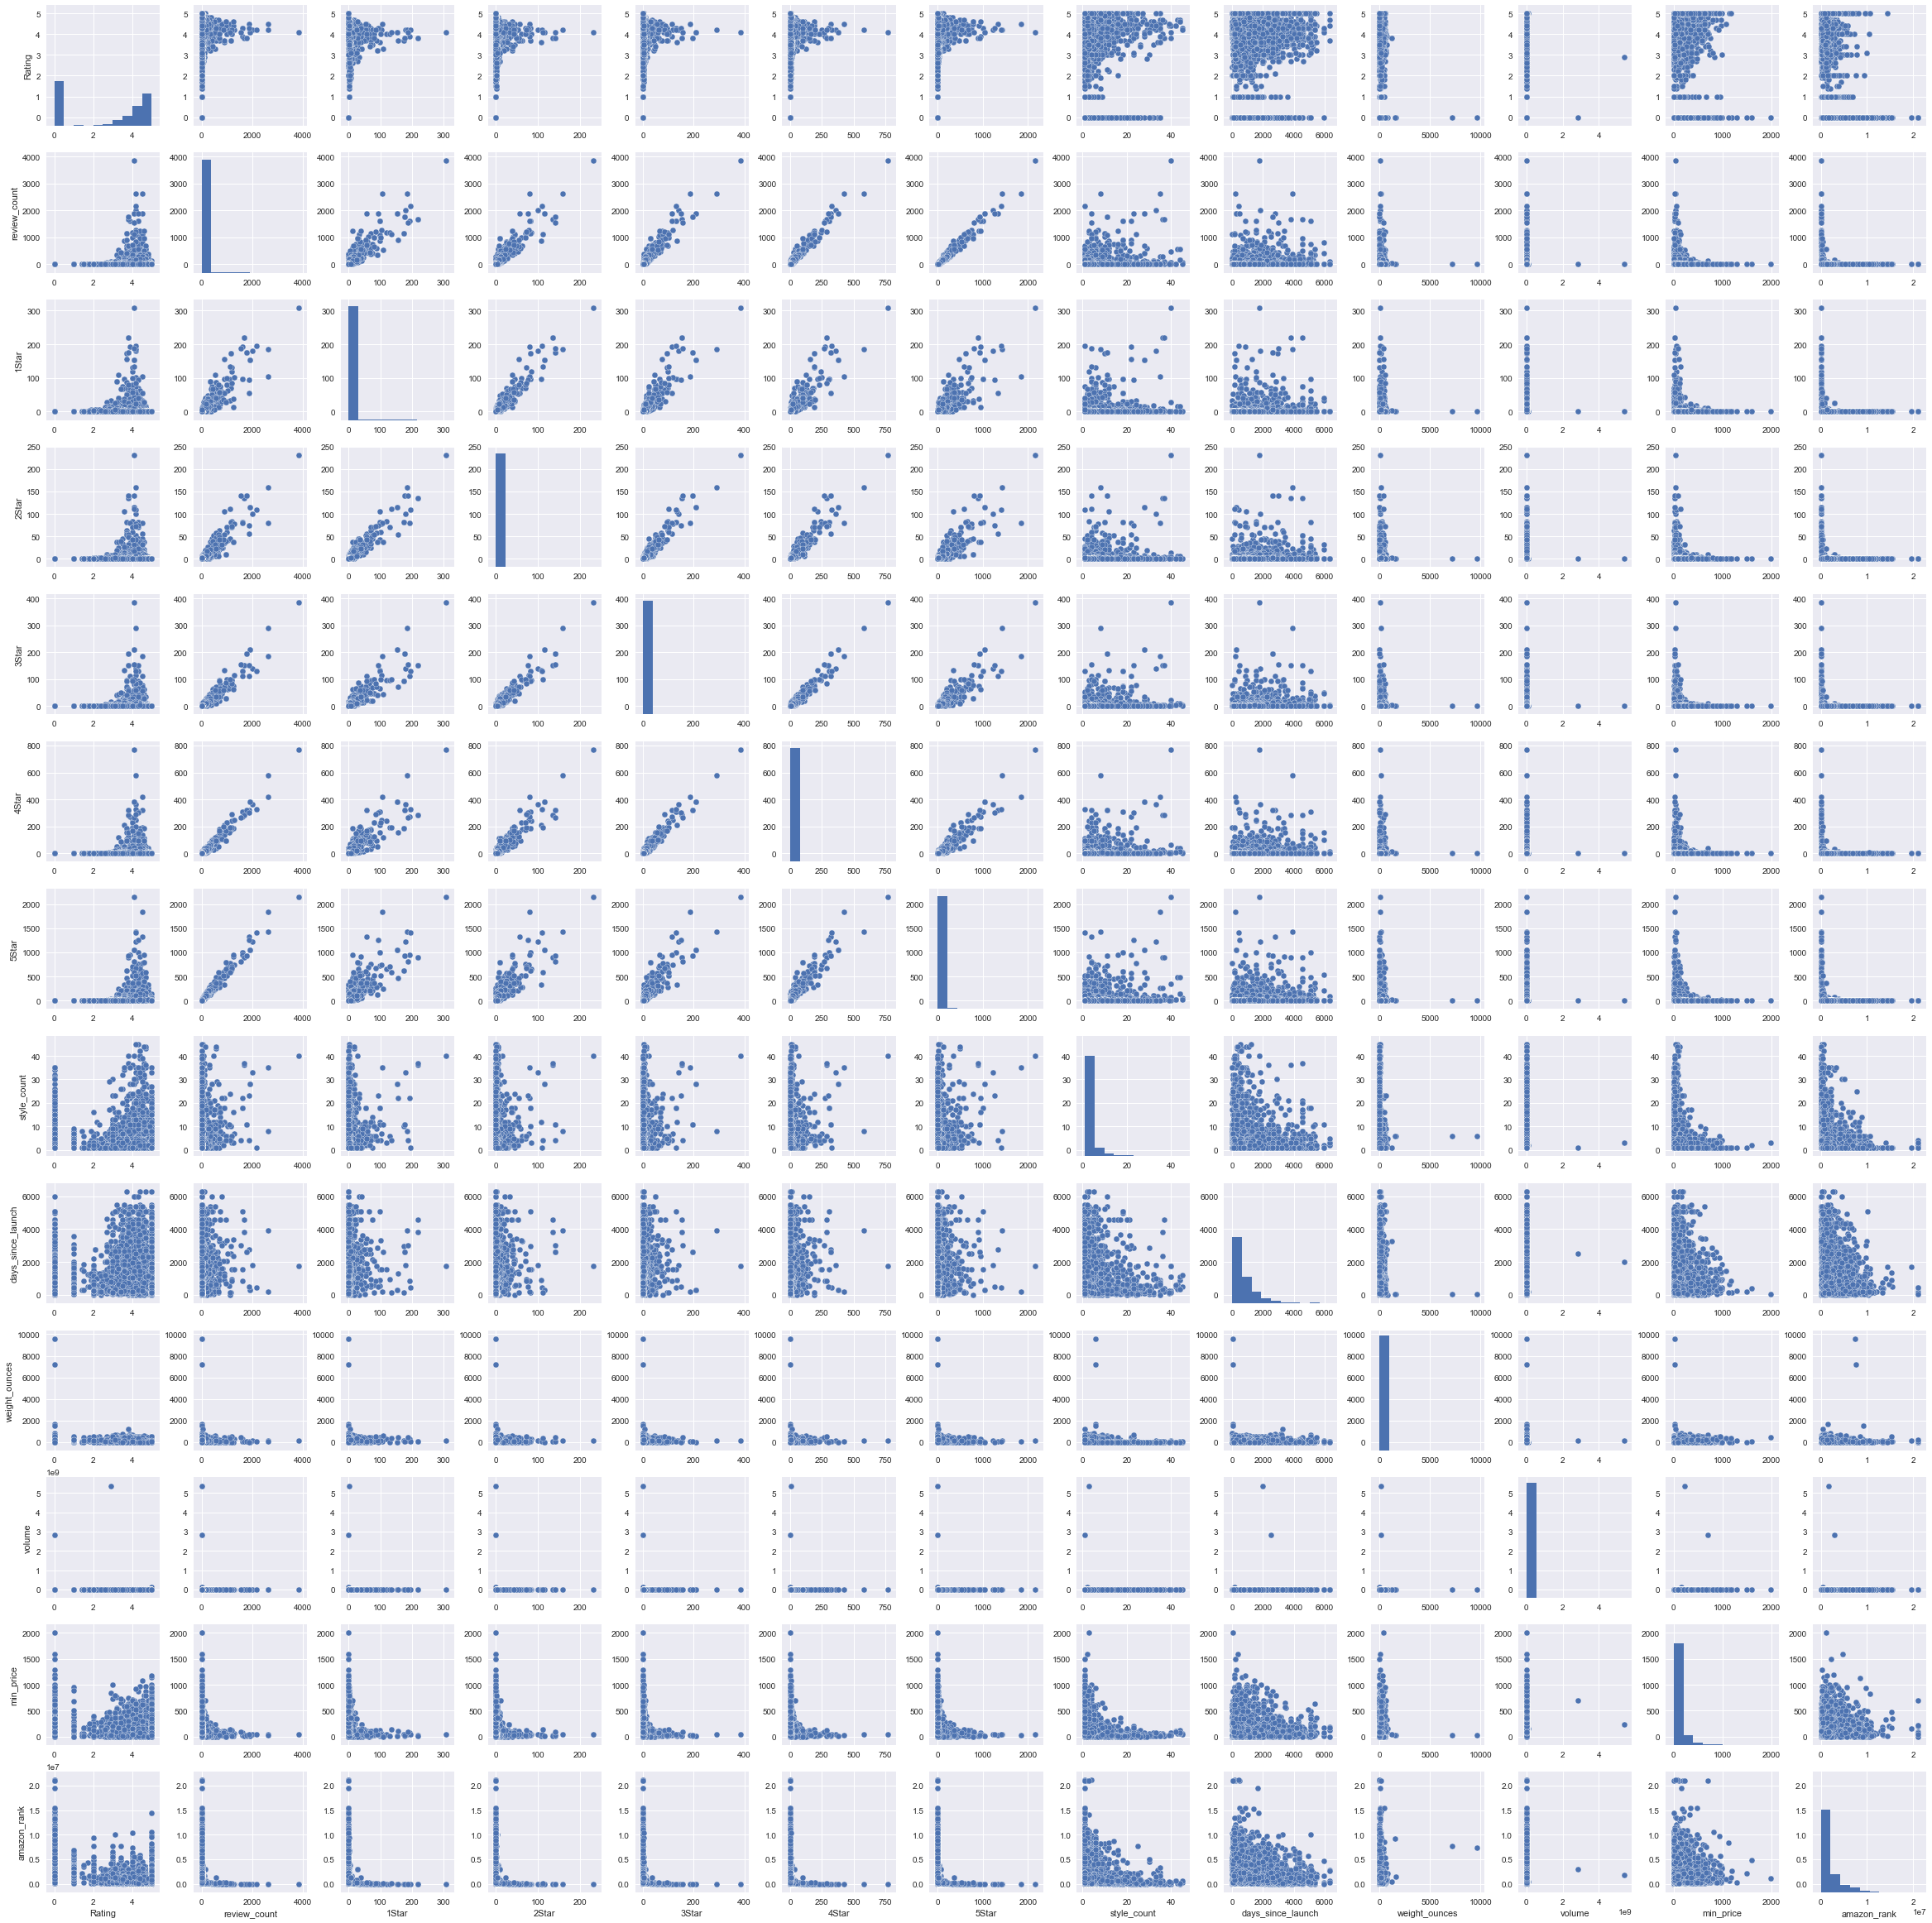

In [45]:
sns.pairplot(dummy_df.fillna(0))

In [46]:
dummy_df.head()

,Rating,review_count,1Star,2Star,3Star,4Star,5Star,style_count,days_since_launch,weight_ounces,volume,min_price,amazon_rank
0,4.2,751,75.10,52.57,67.59,112.65,443.09,14,4559.0,34.4,2593.25,65.00,2442.0
1,3.7,1158,173.70,81.06,92.64,185.28,625.32,10,140.0,107.2,NaN,42.99,2324.0
2,4.3,1621,97.26,81.05,129.68,307.99,1005.02,18,5069.0,78.4,3168.00,27.97,1131.0
3,4.5,1875,56.25,56.25,112.50,318.75,1331.25,4,2784.0,32.0,6451.50,20.24,2087.0
4,4.4,611,24.44,24.44,42.77,122.20,397.15,3,1785.0,111.2,1827.00,89.99,7933.0


In [47]:
# df.corr()

In [48]:
# sns.distplot(df['inverse_rank'])

In [49]:
# dummy_df.dtypes

In [50]:
X=dummy_df.loc[:,['1Star', '2Star', '3Star', '4Star', '5Star', 'Rating',
       'style_count', 'days_since_launch', 'weight_ounces', 'volume']]

y=dummy_df['amazon_rank']

model = sm.OLS(y,sm.add_constant(X), missing="drop")
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amazon_rank   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     207.1
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        21:18:06   Log-Likelihood:            -1.0975e+05
No. Observations:                6977   AIC:                         2.195e+05
Df Residuals:                    6966   BIC:                         2.196e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.701e+06   4.12e+04     65.526      0.000    2.62e+06    2.78e+06
1Star             -3669.8813   6119.074     -0.600      0.549   -1.57e+04    8325.368
2Star             -1.272e+04   1.36e+04     -0.935      0.350   -3.94e+04     1.4e+04
3Star              7165.7530      1e+04      0.716      0.474   -1.24e+04    2.68e+04
4Star              7109.4227   5476.896      1.298      0.194   -3626.961    1.78e+04
5Star             -3691.4360    857.101     -4.307      0.000   -5371.615   -2011.257
Rating            -4.103e+05   1.02e+04    -40.301      0.000    -4.3e+05    -3.9e+05
style_count       -3.606e+04   5355.385     -6.733      0.000   -4.66e+04   -2.56e+04
days_since_launch   214.8380     22.596      9.508      0.000     170.543     259.133
weight_ounces      -573.2529    108.637     -5.277      0.000    -786.215    -360.291
volume            -1.292e-05      0.000     -0.048      0.962      -0.001       0.001
==============================================================================
Omnibus:                     4624.572   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92730.017
Skew:                           2.883   Prob(JB):                         0.00
Kurtosis:                      19.904   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
y_pred = results.predict(sm.add_constant(X))

Text(0,0.5,'Residual')

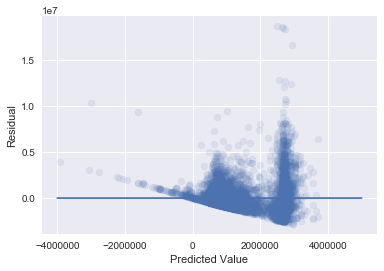

In [61]:
plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(-4000000,5000000,10000),np.linspace(0,0,10000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

In [65]:
whos

Variable               Type                        Data/Info
------------------------------------------------------------
Lasso                  ABCMeta                     <class 'sklearn.linear_mo<...>oordinate_descent.Lasso'>
LinearRegression       ABCMeta                     <class 'sklearn.linear_mo<...>l.base.LinearRegression'>
Ridge                  ABCMeta                     <class 'sklearn.linear_model.ridge.Ridge'>
X                      DataFrame                           1Star   2Star   3<...>[11029 rows x 10 columns]
amz_df                 DataFrame                                   Brand    <...>n[4205 rows x 13 columns]
amz_df_luggage         DataFrame                                           B<...>n[4896 rows x 14 columns]
amz_df_tt              DataFrame                                            <...>n[3937 rows x 14 columns]
convert_stars          function                    <function convert_stars at 0x10a99cea0>
convert_to_dict        function                    